In [3]:
import pandas as pd
import numpy as np
from datetime import time
import math

# 시각화 라이브러리
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns
%matplotlib inline

In [4]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [5]:
from haversine import haversine

In [6]:
boho_final = pd.read_excel('C:/Users/doong/Desktop/PythonWorkspace/창종설/boho_final_7.xlsx')

In [7]:
boho_final

,Unnamed: 0,시설명,시간대구분,주소,시설종류,구역지정수,CCTV 수,도로표지판 수,과속방지턱 수,위도,...,가해운전자 차종,피해운전자 차종,피해운전자 연령,사고 수,통행량 도로명,통행량,통행량_minmax,총생활인구수_minmax,위험도,위험도_minmax
0,0,GKL행복어린이집,0,서울특별시 강남구 삼성로122길 7 (삼성동),어린이집,1,0,12.0,0,37.510432,...,0.0,0.0,0.0,0,테헤란로(선릉역),903.858124,0.123785,0.150903,0.000002,0.006459
1,1,강남구청직장어린이집,0,서울특별시 강남구 학동로 426 (삼성동),어린이집,1,0,8.0,0,37.517966,...,0.0,0.0,0.0,0,테헤란로(선릉역),903.858124,0.123785,0.150903,0.000002,0.006459
2,2,서울삼릉초등학교,0,서울특별시 강남구 봉은사로63길 22 (삼성동),초등학교,4,0,5.4,0,37.513260,...,0.0,0.0,0.0,0,테헤란로(선릉역),903.858124,0.123785,0.150903,0.000002,0.006459
3,3,삼성어린이집(관악구),0,서울특별시 강남구 영동대로122길 7-6 (삼성동),어린이집,1,0,6.0,0,37.496636,...,0.0,0.0,0.0,0,테헤란로(선릉역),903.858124,0.123785,0.150903,0.000002,0.006459
4,4,서울정애학교,0,서울특별시 강남구 봉은사로81길 16 (삼성동),특수학교,2,0,6.0,0,37.514363,...,0.0,0.0,0.0,0,테헤란로(선릉역),903.858124,0.123785,0.150903,0.000002,0.006459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36235,36235,일신유치원,19,서울특별시 중구 퇴계로6길 36,유치원,1,0,0.0,0,37.556706,...,0.0,0.0,0.0,0,퇴계로(회현역),1152.756060,0.158474,0.142308,0.000003,0.008700
36236,36236,일신유치원,20,서울특별시 중구 퇴계로6길 36,유치원,1,0,0.0,0,37.556706,...,0.0,0.0,0.0,0,퇴계로(회현역),1084.781977,0.149001,0.106985,0.000004,0.010406
36237,36237,일신유치원,21,서울특별시 중구 퇴계로6길 36,유치원,1,0,0.0,0,37.556706,...,0.0,0.0,0.0,0,퇴계로(회현역),1112.964187,0.152929,0.083531,0.000005,0.013036
36238,36238,일신유치원,22,서울특별시 중구 퇴계로6길 36,유치원,1,0,0.0,0,37.556706,...,0.0,0.0,0.0,0,퇴계로(회현역),1024.956269,0.140663,0.064955,0.000005,0.014529


In [8]:
boho_final.drop(["Unnamed: 0"], axis=1, inplace=True)

In [9]:
boho_final.describe()

,시간대구분,구역지정수,CCTV 수,도로표지판 수,과속방지턱 수,위도,경도,보호구역도로폭,속도,총생활인구수,...,부상신고자수,가해운전자 차종,피해운전자 차종,피해운전자 연령,사고 수,통행량,통행량_minmax,총생활인구수_minmax,위험도,위험도_minmax
count,36240.000000,36240.00000,36240.000000,36240.000000,36240.000000,36240.000000,36240.000000,36240.000000,36240.000000,36240.000000,...,36240.000000,36240.000000,36240.000000,36240.000000,36240.000000,36240.000000,36240.000000,36240.000000,36240.000000,36240.000000
mean,11.499807,2.00000,0.549669,8.024071,3.842384,37.552190,126.996145,4.747050,25.949825,27739.755215,...,0.004167,0.702704,0.266455,1.186119,0.038383,1645.951926,0.227212,0.157671,0.000006,0.016731
std,6.922059,1.59513,1.639715,19.309965,10.307874,0.054442,0.090630,5.697355,5.652662,13762.092093,...,0.069366,23.033552,7.514451,7.528026,0.209439,1033.264059,0.144007,0.089531,0.000008,0.021641
min,0.000000,0.00000,0.000000,0.000000,0.000000,37.440234,126.804664,0.000000,9.836159,3503.768696,...,0.000000,0.000000,0.000000,0.000000,0.000000,15.687675,0.000000,0.000000,0.000000,0.000000
25%,5.750000,1.00000,0.000000,0.000000,0.000000,37.505828,126.918121,0.000000,21.879010,18577.342133,...,0.000000,0.000000,0.000000,0.000000,0.000000,875.688098,0.119859,0.098063,0.000002,0.005901
50%,11.500000,2.00000,0.000000,7.225000,0.000000,37.547955,127.015046,4.000000,25.336215,25361.472990,...,0.000000,0.000000,0.000000,0.000000,0.000000,1519.430840,0.209578,0.142198,0.000004,0.011077
75%,17.250000,3.00000,0.000000,9.500000,3.000000,37.591654,127.066969,7.000000,29.434898,34570.528870,...,0.000000,0.000000,0.000000,0.000000,0.000000,2089.501467,0.289030,0.202109,0.000007,0.019670
max,23.000000,13.00000,13.000000,702.000000,100.000000,37.686930,127.180269,43.000000,55.482400,157216.598400,...,3.000000,999.000000,999.000000,91.000000,3.000000,7190.780007,1.000000,1.000000,0.000359,1.000000


C:\Users\doong\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '위험도 분포')

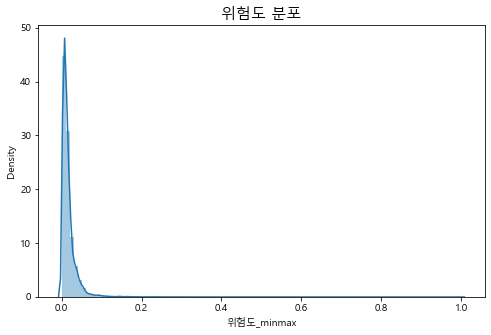

In [10]:
# 위험도 분포
plt.figure(figsize=(8,5))
sns.distplot(boho_final['위험도_minmax'], bins = 100)
plt.title("위험도 분포",fontdict={'fontsize':15})

In [11]:
index = boho_final[boho_final["위험도_minmax"] == 1].index
boho_final_1 = boho_final.drop(index)

In [12]:
boho_final_1

,시설명,시간대구분,주소,시설종류,구역지정수,CCTV 수,도로표지판 수,과속방지턱 수,위도,경도,...,가해운전자 차종,피해운전자 차종,피해운전자 연령,사고 수,통행량 도로명,통행량,통행량_minmax,총생활인구수_minmax,위험도,위험도_minmax
0,GKL행복어린이집,0,서울특별시 강남구 삼성로122길 7 (삼성동),어린이집,1,0,12.0,0,37.510432,127.051243,...,0.0,0.0,0.0,0,테헤란로(선릉역),903.858124,0.123785,0.150903,0.000002,0.006459
1,강남구청직장어린이집,0,서울특별시 강남구 학동로 426 (삼성동),어린이집,1,0,8.0,0,37.517966,127.047061,...,0.0,0.0,0.0,0,테헤란로(선릉역),903.858124,0.123785,0.150903,0.000002,0.006459
2,서울삼릉초등학교,0,서울특별시 강남구 봉은사로63길 22 (삼성동),초등학교,4,0,5.4,0,37.513260,127.046914,...,0.0,0.0,0.0,0,테헤란로(선릉역),903.858124,0.123785,0.150903,0.000002,0.006459
3,삼성어린이집(관악구),0,서울특별시 강남구 영동대로122길 7-6 (삼성동),어린이집,1,0,6.0,0,37.496636,127.058851,...,0.0,0.0,0.0,0,테헤란로(선릉역),903.858124,0.123785,0.150903,0.000002,0.006459
4,서울정애학교,0,서울특별시 강남구 봉은사로81길 16 (삼성동),특수학교,2,0,6.0,0,37.514363,127.054425,...,0.0,0.0,0.0,0,테헤란로(선릉역),903.858124,0.123785,0.150903,0.000002,0.006459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36235,일신유치원,19,서울특별시 중구 퇴계로6길 36,유치원,1,0,0.0,0,37.556706,126.978900,...,0.0,0.0,0.0,0,퇴계로(회현역),1152.756060,0.158474,0.142308,0.000003,0.008700
36236,일신유치원,20,서울특별시 중구 퇴계로6길 36,유치원,1,0,0.0,0,37.556706,126.978900,...,0.0,0.0,0.0,0,퇴계로(회현역),1084.781977,0.149001,0.106985,0.000004,0.010406
36237,일신유치원,21,서울특별시 중구 퇴계로6길 36,유치원,1,0,0.0,0,37.556706,126.978900,...,0.0,0.0,0.0,0,퇴계로(회현역),1112.964187,0.152929,0.083531,0.000005,0.013036
36238,일신유치원,22,서울특별시 중구 퇴계로6길 36,유치원,1,0,0.0,0,37.556706,126.978900,...,0.0,0.0,0.0,0,퇴계로(회현역),1024.956269,0.140663,0.064955,0.000005,0.014529


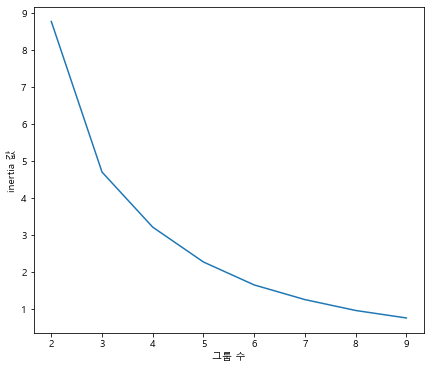

In [13]:
## k-means clustering
from sklearn.cluster import KMeans

X = boho_final[["위험도_minmax"]]
X_train = pd.get_dummies(X)
model = KMeans(n_clusters=3, random_state=0)
model.fit(X)
y_pred = model.labels_
boho_final['cluster_label'] = y_pred

inertia_list = []
k_list = range(2,10)
for k in k_list:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertia_list.append(model.inertia_)
plt.figure(figsize=(7,6))
plt.plot(k_list, inertia_list)
plt.xlabel("그룹 수")
plt.ylabel("inertia 값")
plt.show()

In [14]:
boho_final["cluster_label"].describe()

count    36240.000000
mean         0.154360
std          0.380493
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: cluster_label, dtype: float64

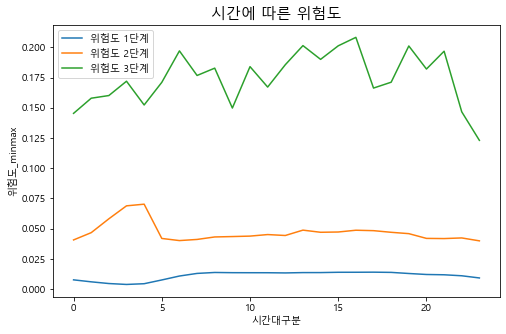

In [15]:
plt.figure(figsize=(8,5))
sns.lineplot(data=boho_final[boho_final['cluster_label']==0], x='시간대구분', y='위험도_minmax', ci=None, label='위험도 1단계')
sns.lineplot(data=boho_final[boho_final['cluster_label']==1], x='시간대구분', y='위험도_minmax', ci=None, label='위험도 2단계')
sns.lineplot(data=boho_final[boho_final['cluster_label']==2], x='시간대구분', y='위험도_minmax', ci=None, label='위험도 3단계')
plt.title("시간에 따른 위험도", fontdict={'fontsize':15})
plt.legend()
plt.show()

In [16]:
boho_final["cluster_label"].value_counts()

0    30904
1     5078
2      258
Name: cluster_label, dtype: int64

In [17]:
# 파생변수 만들기
# 오전/오후 시간대 여부
boho_final["오전/오후"] = boho_final["시간대구분"].apply(lambda x: 1 if(12<=x<=23) else 0)
# 등하교 시간대 여부
boho_final["등하교시간"] = boho_final["시간대구분"].apply(lambda x: 1 if (7<= x <= 9) or (15 <= x <= 17) else 0)
# 점심시간 유무
boho_final["점심시간"] = boho_final["시간대구분"].apply(lambda x: 1 if (12<= x <= 13) else 0)
# 속도 30 이상 유무
boho_final["속도30이상"] = boho_final["속도"].apply(lambda x : 1 if (30 < x) else 0)

In [19]:
boho_final

,시설명,시간대구분,주소,시설종류,구역지정수,CCTV 수,도로표지판 수,과속방지턱 수,위도,경도,...,통행량_minmax,총생활인구수_minmax,위험도,위험도_minmax,cluster_label,오전/오후,등하교시간,점심시간,속도30이상,주변보호구역유무
0,GKL행복어린이집,0,서울특별시 강남구 삼성로122길 7 (삼성동),어린이집,1,0,12.0,0,37.510432,127.051243,...,0.123785,0.150903,0.000002,0.006459,0,0,0,0,1,1
1,강남구청직장어린이집,0,서울특별시 강남구 학동로 426 (삼성동),어린이집,1,0,8.0,0,37.517966,127.047061,...,0.123785,0.150903,0.000002,0.006459,0,0,0,0,0,1
2,서울삼릉초등학교,0,서울특별시 강남구 봉은사로63길 22 (삼성동),초등학교,4,0,5.4,0,37.513260,127.046914,...,0.123785,0.150903,0.000002,0.006459,0,0,0,0,0,1
3,삼성어린이집(관악구),0,서울특별시 강남구 영동대로122길 7-6 (삼성동),어린이집,1,0,6.0,0,37.496636,127.058851,...,0.123785,0.150903,0.000002,0.006459,0,0,0,0,1,1
4,서울정애학교,0,서울특별시 강남구 봉은사로81길 16 (삼성동),특수학교,2,0,6.0,0,37.514363,127.054425,...,0.123785,0.150903,0.000002,0.006459,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36235,일신유치원,19,서울특별시 중구 퇴계로6길 36,유치원,1,0,0.0,0,37.556706,126.978900,...,0.158474,0.142308,0.000003,0.008700,0,1,0,0,0,0
36236,일신유치원,20,서울특별시 중구 퇴계로6길 36,유치원,1,0,0.0,0,37.556706,126.978900,...,0.149001,0.106985,0.000004,0.010406,0,1,0,0,0,0
36237,일신유치원,21,서울특별시 중구 퇴계로6길 36,유치원,1,0,0.0,0,37.556706,126.978900,...,0.152929,0.083531,0.000005,0.013036,0,1,0,0,0,0
36238,일신유치원,22,서울특별시 중구 퇴계로6길 36,유치원,1,0,0.0,0,37.556706,126.978900,...,0.140663,0.064955,0.000005,0.014529,0,1,0,0,0,0


In [ ]:
boho_final.to_excel("boho_final(클러스터링).xlsx")

NameError: name 'boho_final' is not defined